In [ ]:
%cd /kaggle/input/newcodefiles/lightning_version

/kaggle/input/newcodefiles/lightning_version


In [ ]:
!pip3 install torch_lr_finder

In [ ]:
import config
from custom_models.YOLOv3.utils import get_loaders

import warnings
warnings.filterwarnings("ignore")

import torch
import torch.optim as optim

import pandas as pd
from custom_models.YOLOv3.loss import YoloLoss
loss_fn = YoloLoss()
from IPython.core.display import display
import seaborn as sn
from custom_models.YOLOv3.model import YOLOv3
from custom_models.YOLOv3.dataset import YOLODataModule
from custom_models.YOLOv3.main import YOLOTraining,check_accuracy,make_trainer
from custom_models.utils import find_max
from custom_models.YOLOv3.utils import find_max_lr, criterion
import os
import warnings
warnings.filterwarnings("ignore")

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/opt/conda/lib/python3.10/site-packages/torch_lr_finder/lr_finder.py:5: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [ ]:
print("/kaggle/input/pascal-voc-dataset-used-in-yolov3-video/PASCAL_VOC/" + "train.csv")
train_loader, test_loader, train_eval_loader = get_loaders(
    train_csv_path="/kaggle/input/pascal-voc-dataset-used-in-yolov3-video/PASCAL_VOC/"+ "train.csv", test_csv_path="/kaggle/input/pascal-voc-dataset-used-in-yolov3-video/PASCAL_VOC/" + "test.csv"
)

/kaggle/input/pascal-voc-dataset-used-in-yolov3-video/PASCAL_VOC/train.csv


  0%|          | 0/200 [00:00<?, ?it/s]

Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 5.36E-02


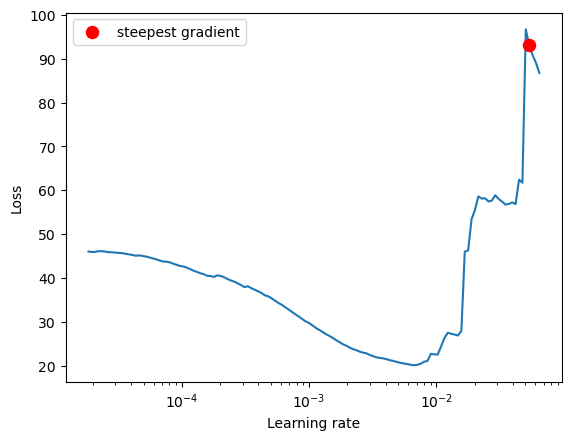

In [ ]:
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
model = YOLOv3(num_classes=config.NUM_CLASSES).to(DEVICE)
optimizer = optim.Adam(
    model.parameters(), lr=config.LEARNING_RATE, weight_decay=config.WEIGHT_DECAY
)
scaled_anchors = (
    torch.tensor(config.ANCHORS)
    * torch.tensor(config.S).unsqueeze(1).unsqueeze(1).repeat(1, 3, 2)
).to(DEVICE)

def criterion(out, y):
    y0, y1, y2 = (
            y[0].to(DEVICE),
            y[1].to(DEVICE),
            y[2].to(DEVICE),
        )
    loss = (
                loss_fn(out[0], y0, scaled_anchors[0])
                + loss_fn(out[1], y1, scaled_anchors[1])
                + loss_fn(out[2], y2, scaled_anchors[2])
            )
    return loss

end_lr = 2

find_max_lr(model,optimizer,criterion,train_loader,end_lr)

In [ ]:
max_epochs = 40
max_lr = 5.36E-02
learning_rate = config.LEARNING_RATE
weight_decay = config.WEIGHT_DECAY
check_val_every_n_epoch = 20
make_trainer(max_epochs,train_loader, test_loader, train_eval_loader,max_lr,
                 learning_rate,weight_decay,check_val_every_n_epoch,config,precision=16,
                 refresh_rate=10,accelerator="auto",
                 tensorboard_logs = "/kaggle/working/tf_logs/",
                 csv_logs = "/kaggle/working/csv_training_logs/"
            )

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]